<a href="https://colab.research.google.com/github/prasadanvekar/elvtrdocs/blob/main/Bonus_Assignment_10_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  

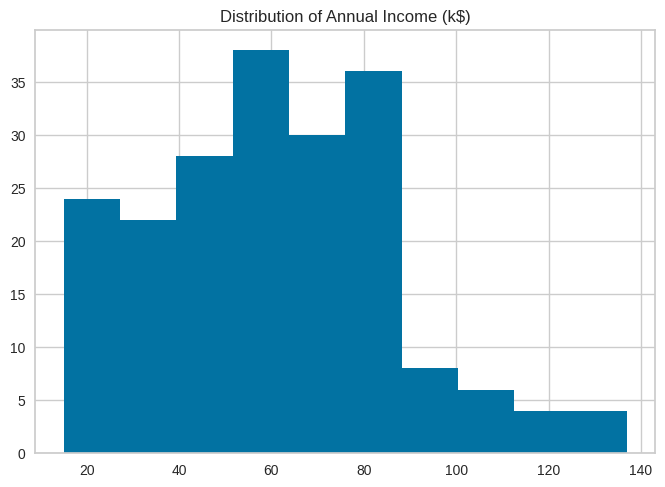

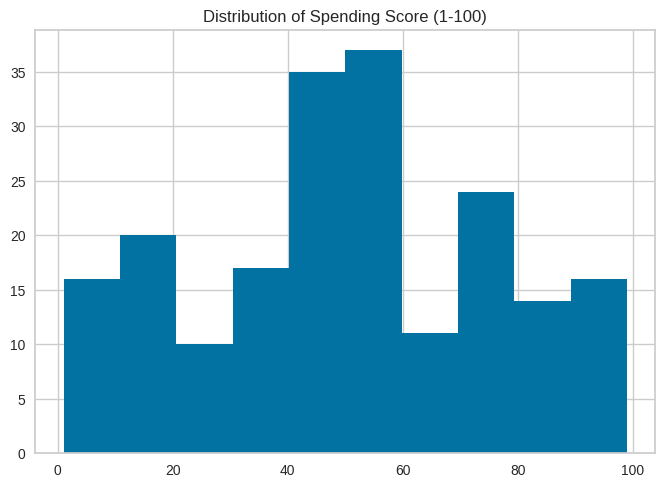

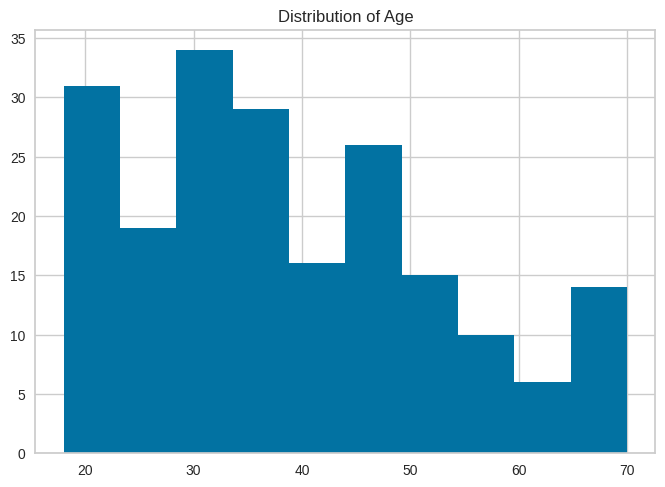

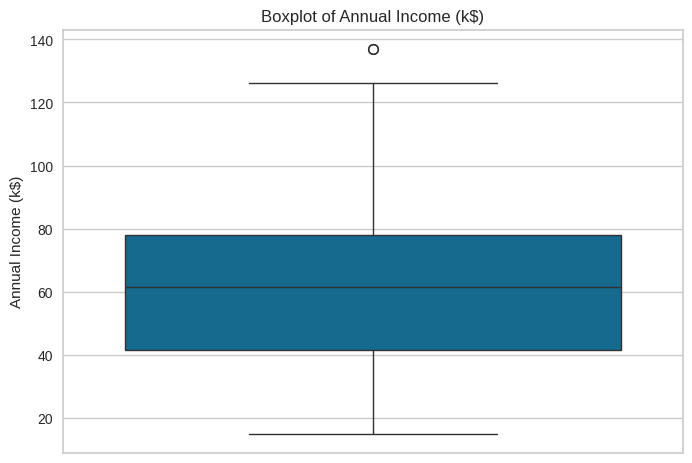

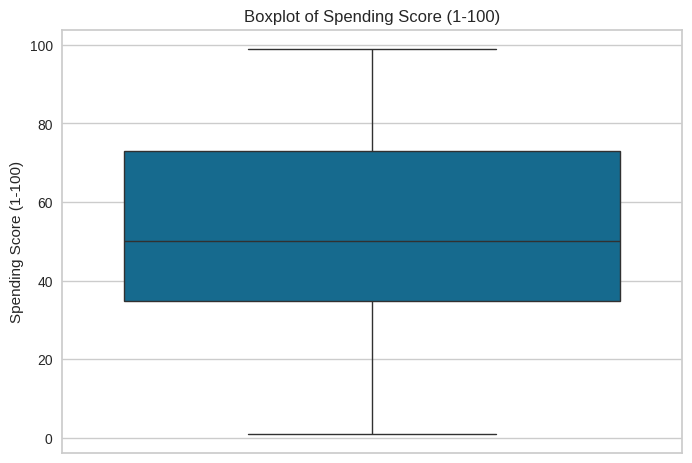

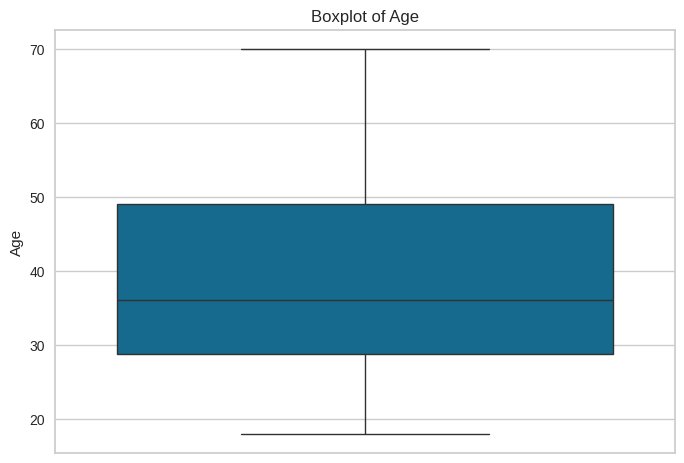

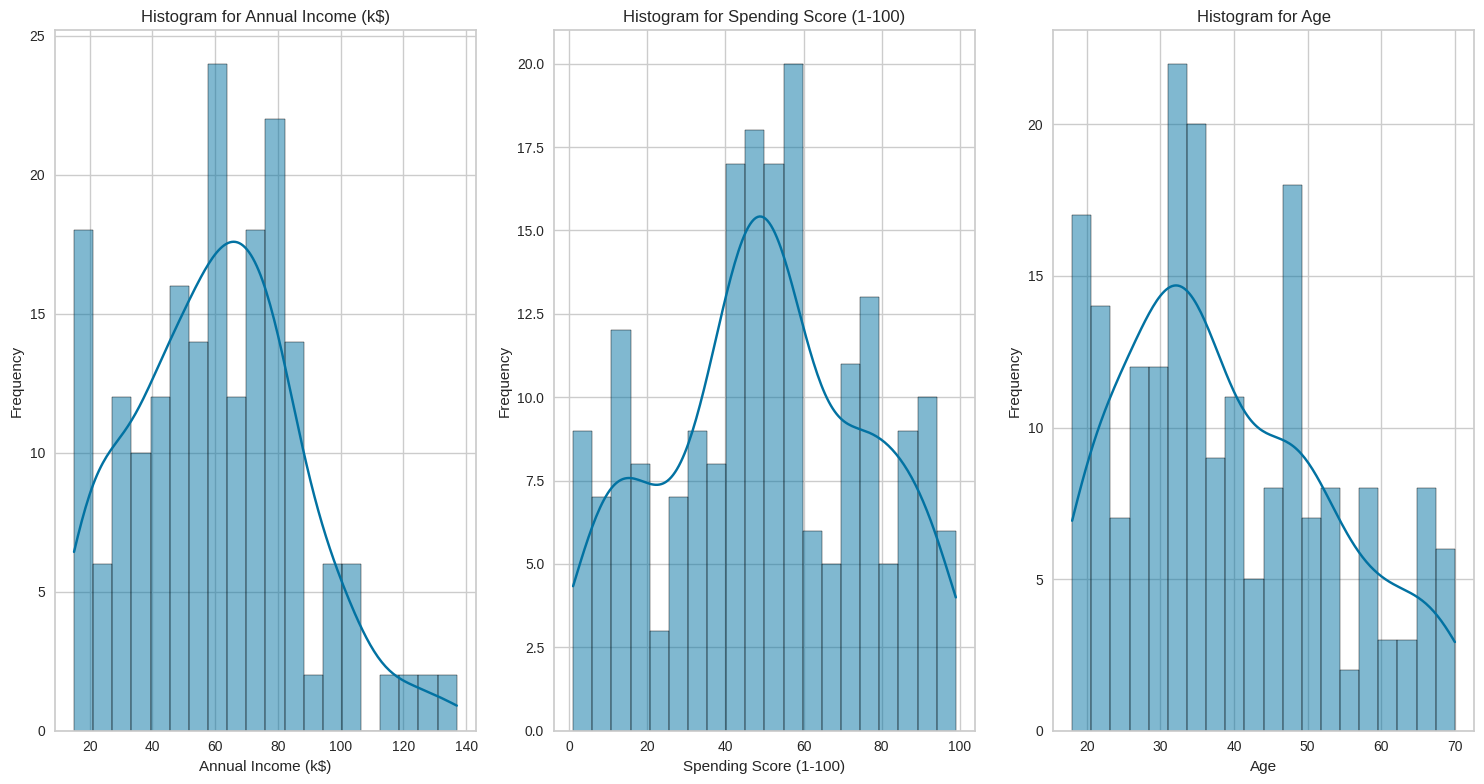

Correlation Matrix for Numeric Variables:
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


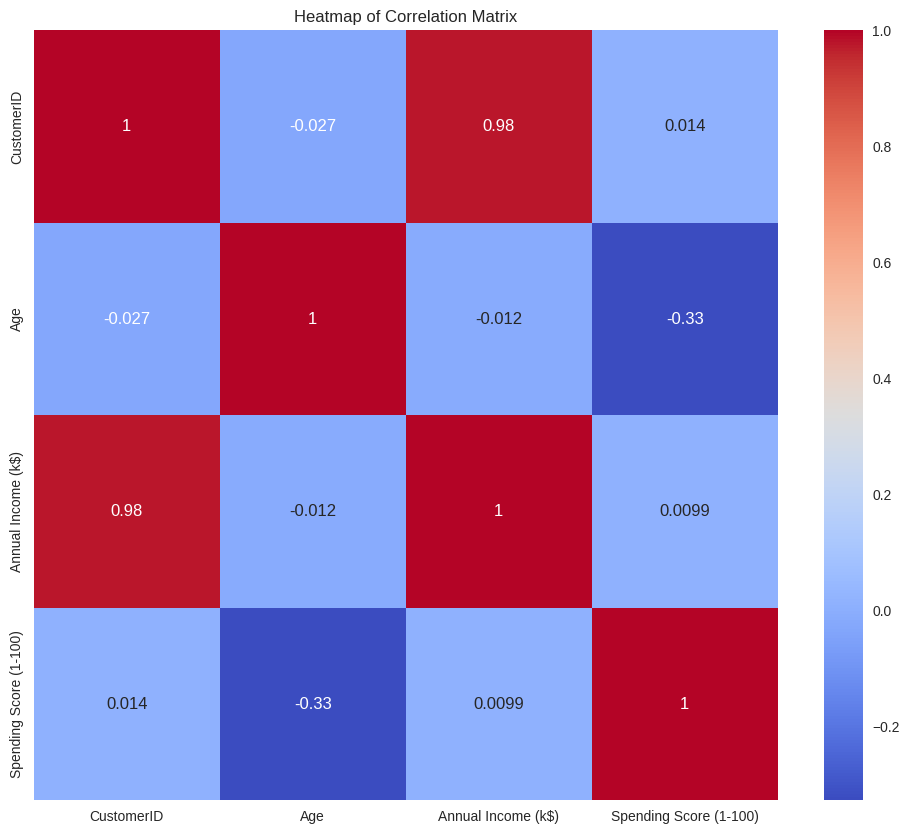

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

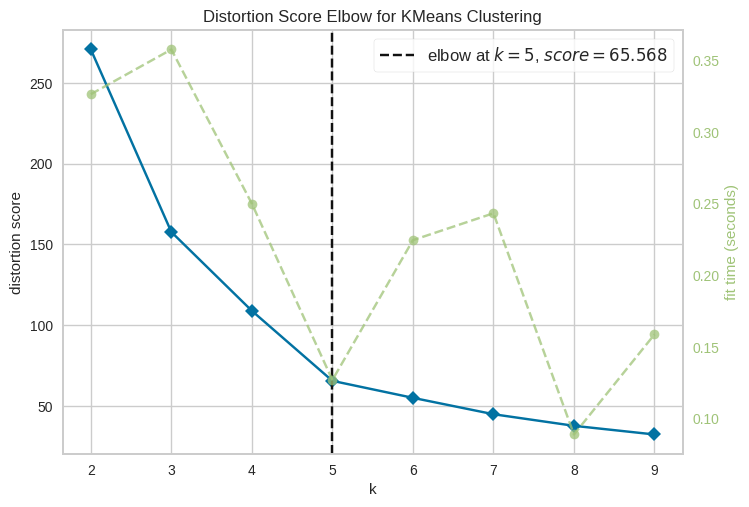

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


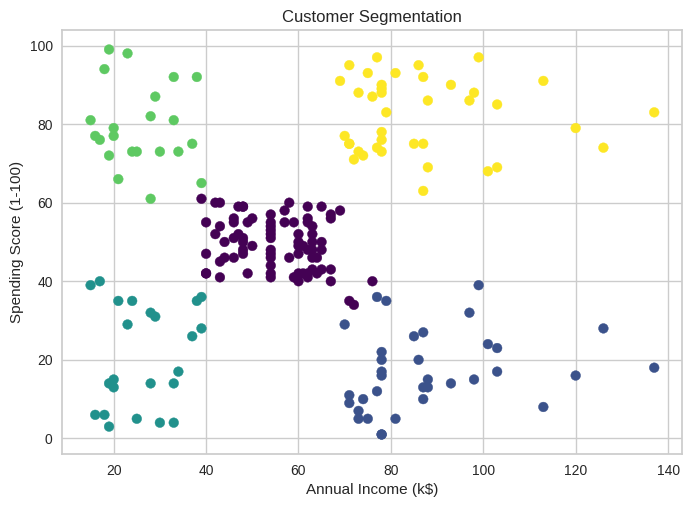

           0          1
0  55.296296  49.518519
1  88.200000  17.114286
2  26.304348  20.913043
3  25.727273  79.363636
4  86.538462  82.128205


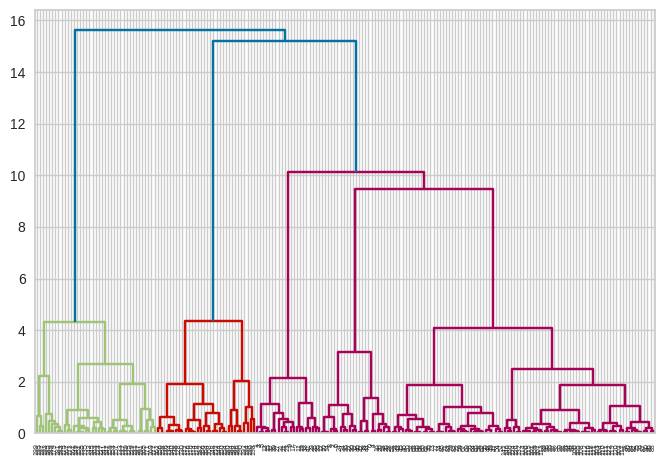

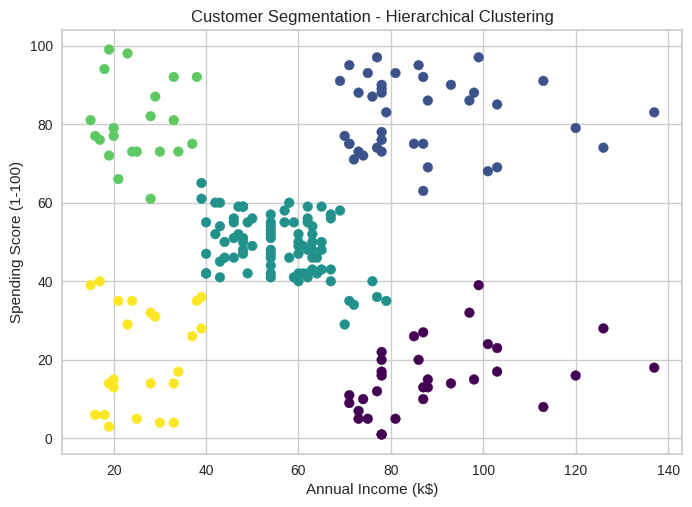

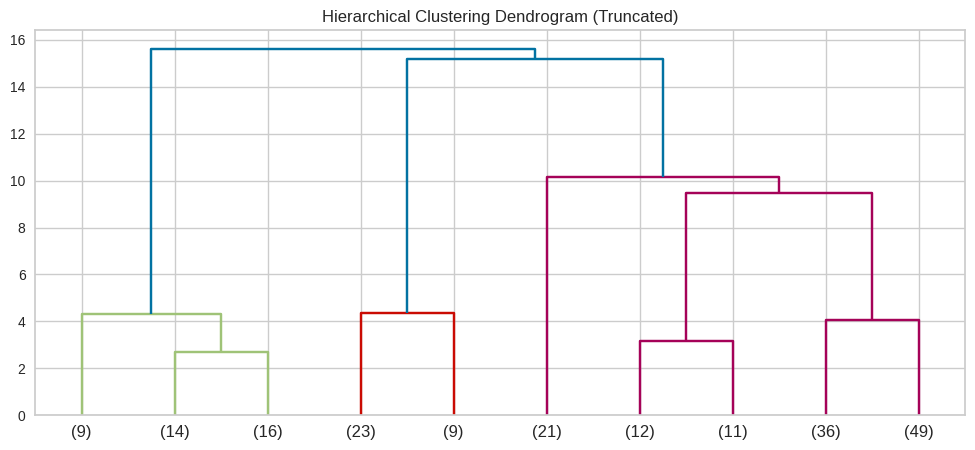

Metrics for KMeans Clustering:
Silhouette Score: 0.5546571631111091
Adjusted Rand Index: 0.9419606318143182
Mutual Information: 1.3894928304124785
Homogeneity: 0.9379665154390859
Completeness: 0.9510419321635281
V-Measure: 0.9444589708214342

Metrics for Hierarchical Clustering:
Silhouette Score: 0.5538089226688662
Adjusted Rand Index: 0.9419606318143182
Mutual Information: 1.3894928304124785
Homogeneity: 0.9510419321635281
Completeness: 0.9379665154390859
V-Measure: 0.9444589708214342

Metrics for DBSCAN Clustering:
Silhouette Score: 0.35044619989666004
Adjusted Rand Index: 0.28437420060566243
Mutual Information: 0.49903488810850827
Homogeneity: 0.7999907319314615
Completeness: 0.3415657093119633
V-Measure: 0.4787313038986195



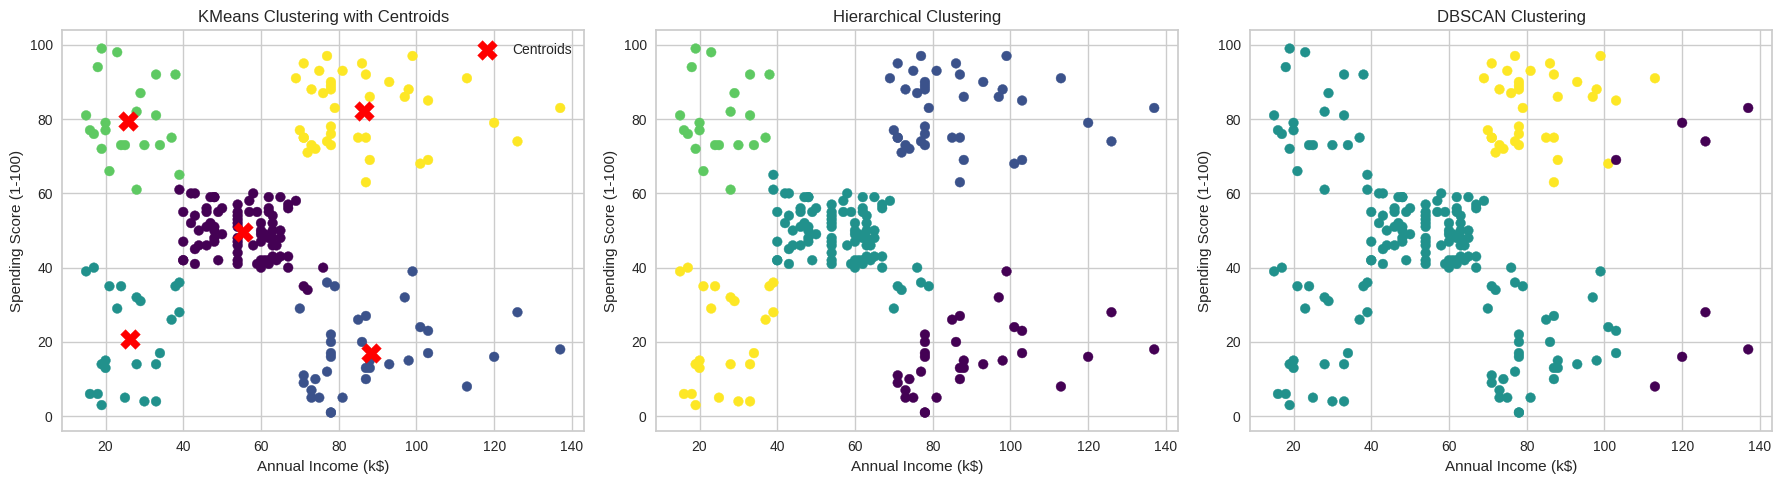

Number of Noise Points: 8


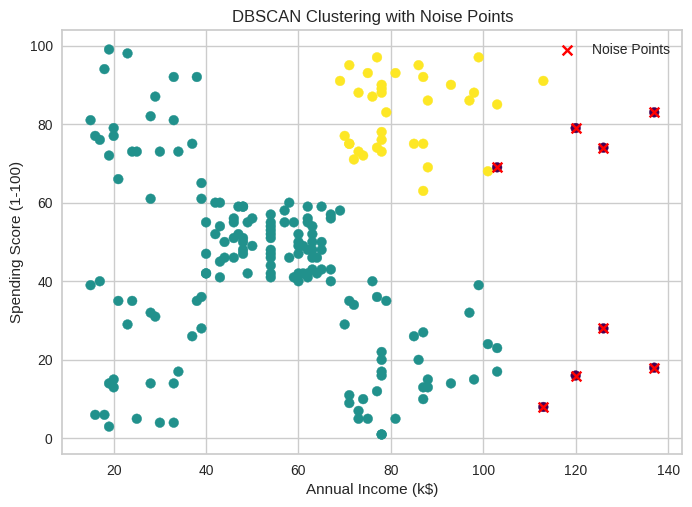

Cluster Sizes:
 0    157
 1     35
-1      8
Name: Cluster_DBSCAN, dtype: int64


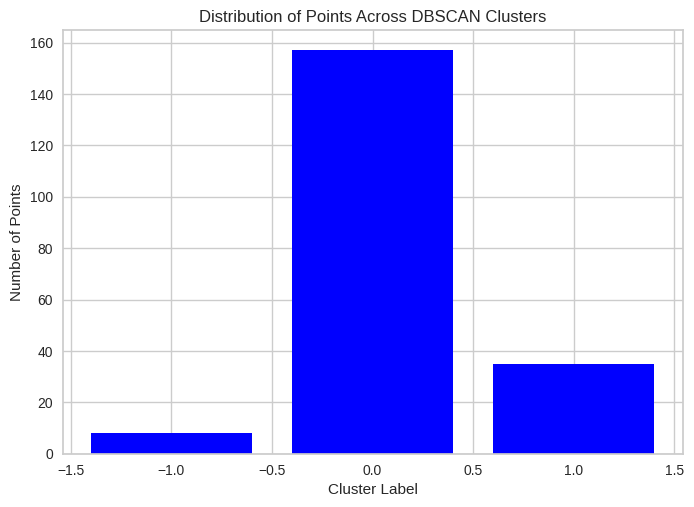

Cluster Densities:
 0    0.817708
 1    0.182292
-1    0.041667
Name: Cluster_DBSCAN, dtype: float64


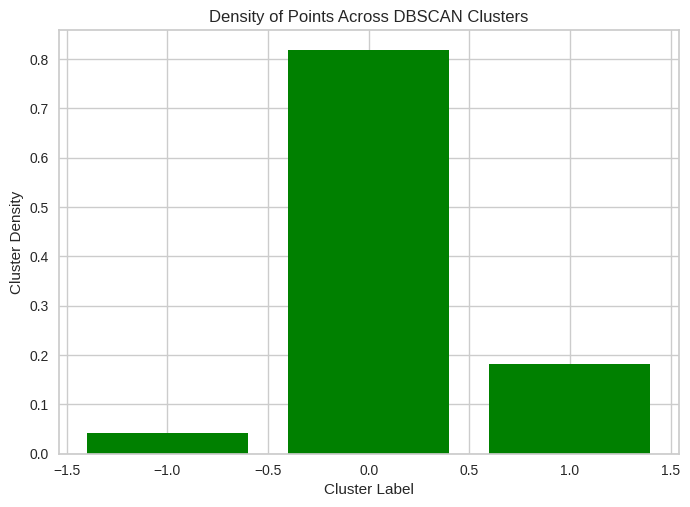

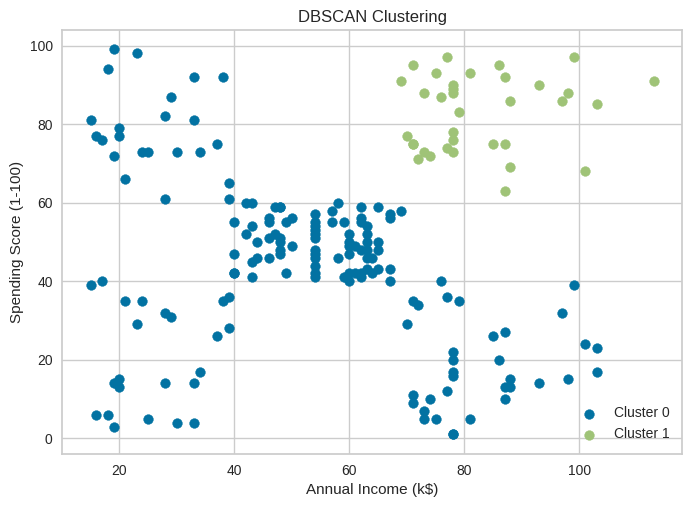

In [2]:
###############################################################################################
# Assignment#4:Customer Segmentation                                                          #
# Objective : Implement Customer Segemention Technique for the given dataset                  #
# Author: Prasad S Anvekar                                                                    #
# Date: 26 Jan 2024                                                                           #
###############################################################################################

# Importing the required libraries

import os
import pandas as pd
import sklearn as sk
import json
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import adjusted_rand_score, mutual_info_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Data Path where the file are located.
# File will have to be uploaded to required folder/directory before running the code.

DATA_PATH = "Mall_Customers.csv"

# Error Hanlding for Data Path and File not found scenarios.

if os.path.exists(DATA_PATH):
    # Read from file if we've already downloaded the data.
    with open(DATA_PATH) as f:
        data = pd.read_csv('Mall_Customers.csv', low_memory=False)
else:
     print("File not found!")

#################################################################
#Data exploration, analysis & Preprocessing
#Background: Understanding the dataset's structure and key characteristics.

#################################################################
# understanding the data
# Review the Data Structure

print(data.info())

# Review the sample data
print(data.head())
print(data.describe())

#check for any missing values
missing_values = data.isnull().sum()
print(missing_values)

# Visualize the Data Distribution
numeric_columns = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']

for column in numeric_columns:

    plt.hist(data[column])
    plt.title(f"Distribution of {column}")
    plt.show()

# Review Outliers
for column in numeric_columns:

    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


# Data Exploration: Distributions for Numeric Variables
numeric_columns = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
plt.figure(figsize=(15, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)  # Fix the subplot call
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Statistical Analysis on data
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
print("Correlation Matrix for Numeric Variables:")
print(corr_matrix)

# Heatmap for the correlation matrix on data
plt.figure(figsize=(12, 10))
# Selecting a subset of the correlation matrix for better visualization
sns.heatmap(corr_matrix.iloc[:10, :10], annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

#################################################################
#Enhanced Clustering with K-Means
#Background: Application of K-Means clustering to the standardized data.
#################################################################
# Select relevant features for clustering
selected_features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

# Identify the optimized cluster parameter using Elbow Visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(scaled_data)
visualizer.show()


# Apply KMeans clustering
num_clusters = 5  # Adjusted based on the KElbow visualizer
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters (for two features)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Display the cluster centers (in the standardized feature space)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers)
print(cluster_centers_df)


#################################################################
#Advanced Implementation of Hierarchical Clustering
#Background: Applying and interpreting Hierarchical Clustering.
#################################################################
# Prepare for Hierarchical Clustering
Z = linkage(scaled_data, 'ward')
dendrogram(Z)
plt.show()

# Apply Hierarchical Clustering
num_clusters_hierarchical = 5  # Adjusted based on dendrogram
hierarchical = AgglomerativeClustering(n_clusters=num_clusters_hierarchical)
data['Cluster_Hierarchical'] = hierarchical.fit_predict(scaled_data)

# Visualize the clusters for Hierarchical Clustering
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster_Hierarchical'], cmap='viridis')
plt.title('Customer Segmentation - Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Evaluate Linkage Method for Hierarchical Clustering
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='lastp', p=10, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.show()

#################################################################
#Advanced Implementation of DBSCAN
#Background: Applying and interpreting DBSCAN.
#################################################################
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster_DBSCAN'] = dbscan.fit_predict(scaled_data)

#################################################################
#Comprehensive Cluster Analysis
#Background: Deeper evaluation of the clustering results.

#################################################################
# Comprehensive Cluster Analysis

# Calculate various cluster quality metrics for KMeans
silhouette_kmeans = silhouette_score(scaled_data, data['Cluster'])
ari_kmeans = adjusted_rand_score(data['Cluster'], data['Cluster_Hierarchical'])
mi_kmeans = mutual_info_score(data['Cluster'], data['Cluster_Hierarchical'])
homogeneity_kmeans = homogeneity_score(data['Cluster'], data['Cluster_Hierarchical'])
completeness_kmeans = completeness_score(data['Cluster'], data['Cluster_Hierarchical'])
v_measure_kmeans = v_measure_score(data['Cluster'], data['Cluster_Hierarchical'])

print("Metrics for KMeans Clustering:")
print(f"Silhouette Score: {silhouette_kmeans}")
print(f"Adjusted Rand Index: {ari_kmeans}")
print(f"Mutual Information: {mi_kmeans}")
print(f"Homogeneity: {homogeneity_kmeans}")
print(f"Completeness: {completeness_kmeans}")
print(f"V-Measure: {v_measure_kmeans}\n")

# Calculate various cluster quality metrics for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(scaled_data, data['Cluster_Hierarchical'])
ari_hierarchical = adjusted_rand_score(data['Cluster_Hierarchical'], data['Cluster'])
mi_hierarchical = mutual_info_score(data['Cluster_Hierarchical'], data['Cluster'])
homogeneity_hierarchical = homogeneity_score(data['Cluster_Hierarchical'], data['Cluster'])
completeness_hierarchical = completeness_score(data['Cluster_Hierarchical'], data['Cluster'])
v_measure_hierarchical = v_measure_score(data['Cluster_Hierarchical'], data['Cluster'])

print("Metrics for Hierarchical Clustering:")
print(f"Silhouette Score: {silhouette_hierarchical}")
print(f"Adjusted Rand Index: {ari_hierarchical}")
print(f"Mutual Information: {mi_hierarchical}")
print(f"Homogeneity: {homogeneity_hierarchical}")
print(f"Completeness: {completeness_hierarchical}")
print(f"V-Measure: {v_measure_hierarchical}\n")

# Calculate various cluster quality metrics for DBSCAN
silhouette_dbscan = silhouette_score(scaled_data, data['Cluster_DBSCAN'])
ari_dbscan = adjusted_rand_score(data['Cluster_DBSCAN'], data['Cluster_Hierarchical'])  # Compare with Hierarchical for consistency
mi_dbscan = mutual_info_score(data['Cluster_DBSCAN'], data['Cluster_Hierarchical'])
homogeneity_dbscan = homogeneity_score(data['Cluster_DBSCAN'], data['Cluster_Hierarchical'])
completeness_dbscan = completeness_score(data['Cluster_DBSCAN'], data['Cluster_Hierarchical'])
v_measure_dbscan = v_measure_score(data['Cluster_DBSCAN'], data['Cluster_Hierarchical'])

print("Metrics for DBSCAN Clustering:")
print(f"Silhouette Score: {silhouette_dbscan}")
print(f"Adjusted Rand Index: {ari_dbscan}")
print(f"Mutual Information: {mi_dbscan}")
print(f"Homogeneity: {homogeneity_dbscan}")
print(f"Completeness: {completeness_dbscan}")
print(f"V-Measure: {v_measure_dbscan}\n")

#################################################################
#Insightful Reporting and Visualization
#Background: Effective communication of findings.

#################################################################

# Compare Clustering Results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# KMeans Clustering
axes[0].scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
axes[0].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Centroids')
axes[0].set_title('KMeans Clustering with Centroids')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].legend()

# Hierarchical Clustering
axes[1].scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster_Hierarchical'], cmap='viridis')
axes[1].set_title('Hierarchical Clustering')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')

# DBSCAN Clustering
axes[2].scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster_DBSCAN'], cmap='viridis')
axes[2].set_title('DBSCAN Clustering')
axes[2].set_xlabel('Annual Income (k$)')
axes[2].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

# Analyze Noise Points
noise_points = data[data['Cluster_DBSCAN'] == -1]
print(f"Number of Noise Points: {len(noise_points)}")

# Visualize Noise Points
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster_DBSCAN'], cmap='viridis')
plt.scatter(noise_points['Annual Income (k$)'], noise_points['Spending Score (1-100)'], c='red', marker='x', label='Noise Points')
plt.title('DBSCAN Clustering with Noise Points')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Analyze Variable Cluster Sizes
cluster_sizes = data['Cluster_DBSCAN'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

# Visualize Variable Cluster Sizes
plt.bar(cluster_sizes.index, cluster_sizes.values, color='blue')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.title('Distribution of Points Across DBSCAN Clusters')
plt.show()

# Analyze Cluster Densities
cluster_densities = cluster_sizes / (cluster_sizes.sum() - len(noise_points))
print("Cluster Densities:")
print(cluster_densities)

# Visualize Cluster Densities
plt.bar(cluster_densities.index, cluster_densities.values, color='green')
plt.xlabel('Cluster Label')
plt.ylabel('Cluster Density')
plt.title('Density of Points Across DBSCAN Clusters')
plt.show()

# Visualize DBSCAN Clusters
for label in data['Cluster_DBSCAN'].unique():
    if label != -1:  # Exclude noise points
        cluster_points = data[data['Cluster_DBSCAN'] == label]
        plt.scatter(cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'], label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Visualize PCA Results
plt.figure(figsize=(10, 6))
plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster_DBSCAN'], cmap='viridis', alpha=0.8)
plt.title('PCA Results with DBSCAN Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



